### 1. Project Background

This project aims to explore and apply feature Engineering and dimensionality reduction techniques on second-hand car sales datasets. The goal is to prepare the dataset for machine learning models by creating informative features and reducing the feature space while retaining essential information.
The second-hand car market is vast, and predicting the price of a used car is a challenging task due to various factors influencing the price. Feature engineering and dimensionality reduction play a crucial role in improving the performance of predictive models by enhancing the quality of input data and reducing noise.

### 2. Load Data & Libraries

In [1]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Machine Learning Model Evaluation Methods 
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [4]:
#load data
data=pd.read_csv(r'C:\Users\Admin\Desktop\Zindua_School\Unsupervised_Machine_Learning\Week1_Principal_Component_Analysis\datasets\second_hand_cars.csv')
data.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


### 3. Data Preprocessing
#### 3.1 Data Cleaning: Handling missing data


In [6]:
#check for missingness
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

Looks like only 2 features have missingness: Variant and  Accessories
Let us explore the missingness even more...

In [16]:
#how much missingness does each have
total_missing=data.isnull().sum().sort_values(ascending=False)
portion_missing=total_missing/data.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,portion_missing],axis=1,keys=['total missing','percent missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable 
missing_df=missing_df[total_missing>0] # only retain those with missing values 
missing_df['percent missing']=missing_df['percent missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total missing,percent missing
variable,,
Accessories,482,19.28
Variant,262,10.48


Only a small percent of data in each feature is missing, now we can proceed to impute the data, first explore the data type- if it is categorical data impute with the mode, if it is numerical data, plot the distribution and impute either by mean or median

In [24]:
data.Variant

0             EX
1            RXE
2            RXE
3       Highline
4       Highline
          ...   
2495         RXE
2496          LE
2497         RXE
2498          XL
2499          GT
Name: Variant, Length: 2500, dtype: object

In [18]:
data.Accessories

0                     Music System, Sunroof, Alloy Wheels
1                                                     NaN
2                                                     NaN
3                              Music System, Alloy Wheels
4                                       GPS, Music System
                              ...                        
2495                                Music System, Sunroof
2496                                    Music System, GPS
2497                                Alloy Wheels, Sunroof
2498    Leather Seats, Sunroof, Alloy Wheels, Music Sy...
2499                          Leather Seats, Alloy Wheels
Name: Accessories, Length: 2500, dtype: object

<Axes: >

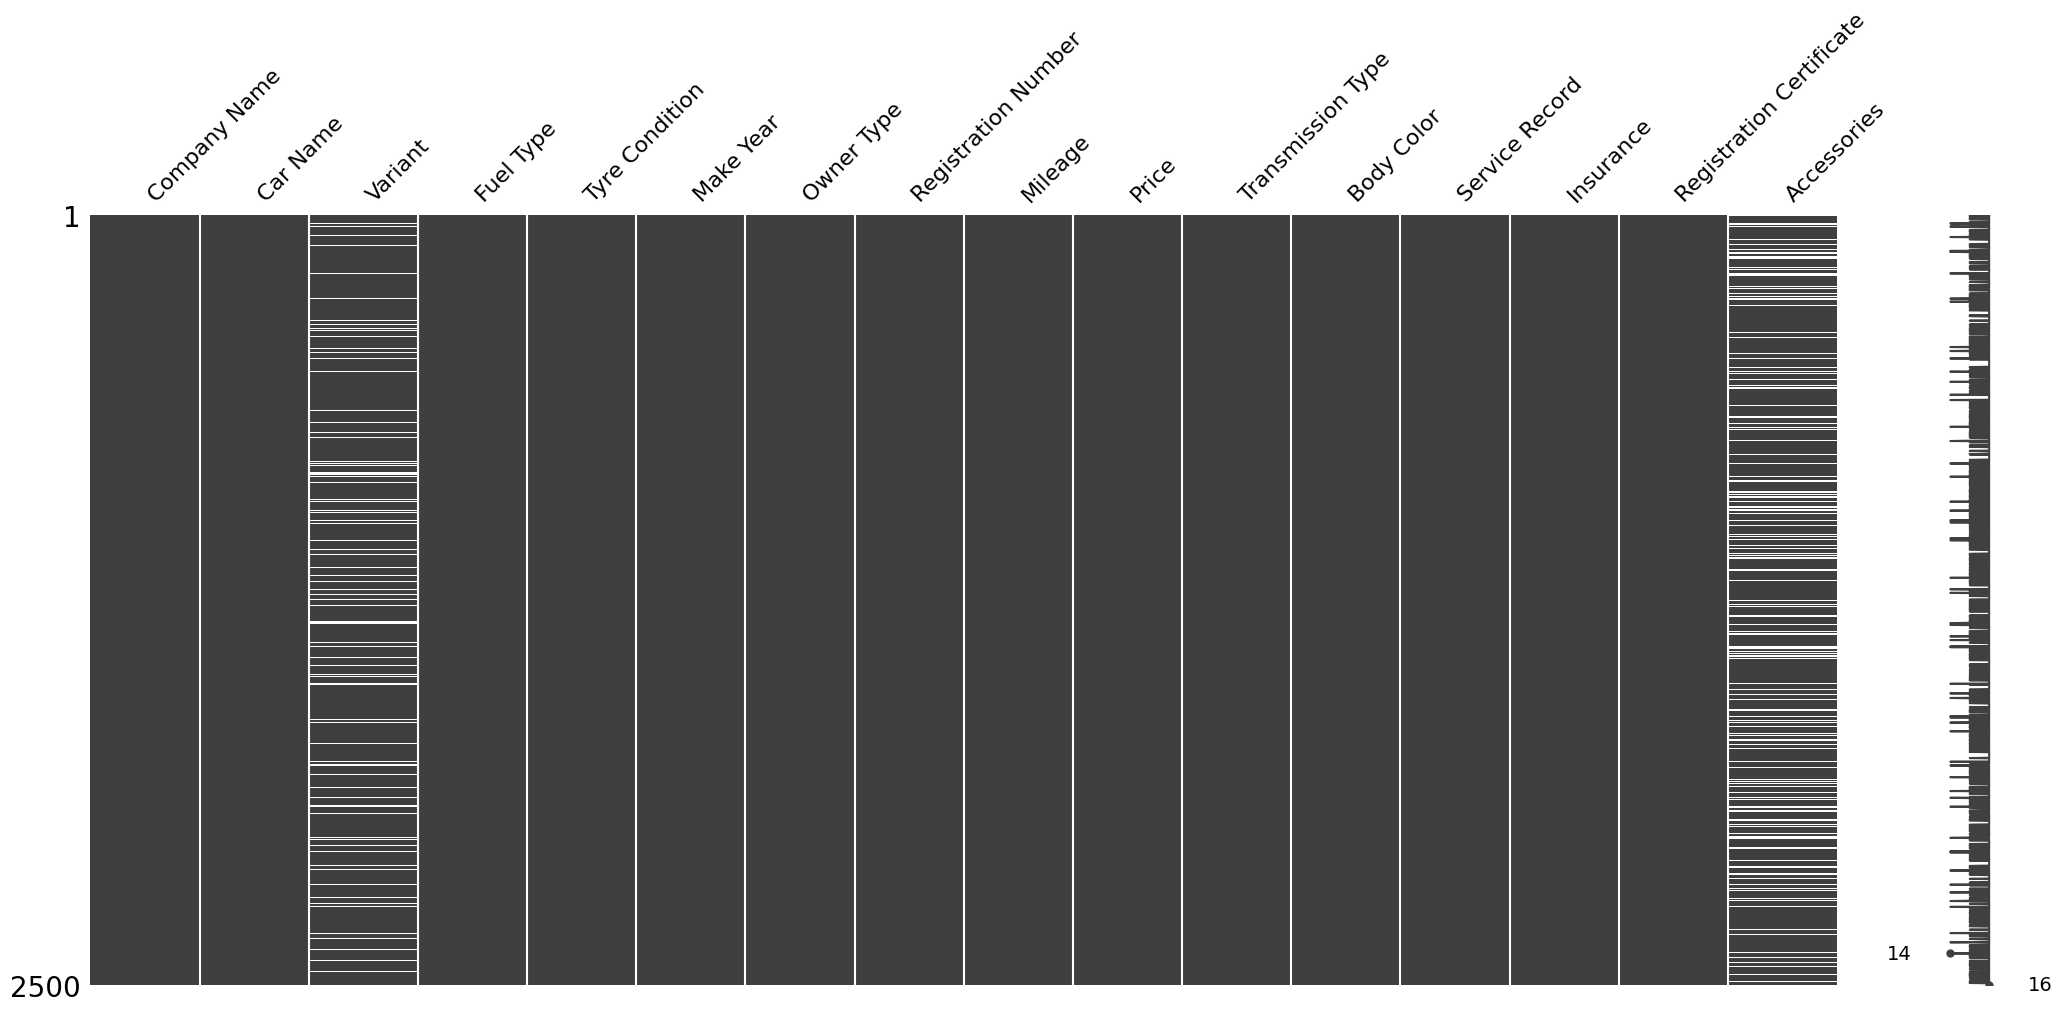

In [20]:
mn.matrix(data)

In [23]:
data['Accessories'].fillna(data['Accessories'].mode(),inplace=True)
#data['Variant'].fillna(data['Variant'].mode(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate